# Plots for the Report

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Strong Scaling

## Dataset 1
Dataset: 2, 4, 8, 16, 32, 64, 128 MB

### Sequential

In [2]:
# Sequential times for 5 runs (file: outputs/output_seq_49834.txt)
file_content = open("outputs/output_seq_49834.txt", "r").readlines()
file_content

['Run,0\n',
 'Compression,15.0698\n',
 'Decompression,3.32559\n',
 'Run,1\n',
 'Compression,15.0407\n',
 'Decompression,3.33028\n',
 'Run,2\n',
 'Compression,15.0602\n',
 'Decompression,3.36833\n',
 'Run,3\n',
 'Compression,15.3094\n',
 'Decompression,3.34513\n',
 'Run,4\n',
 'Compression,15.1399\n',
 'Decompression,3.36504\n']

In [3]:
seq_times = [3.32559, 3.33028, 3.36833, 3.34513, 3.36504]
seq_avg = np.mean(seq_times)

print(seq_avg)

3.3468740000000006


### FastFlow

In [4]:
# COMPRESSION 

def parse_data(file_content):
    # Initialize an empty dictionary to store data for each combination of l and r
    data = {}

    # Process each line in the file
    for line in file_content:
        if line.startswith("Decompression"):
            # Split the line into components
            parts = line.split(",")
            l = int(parts[1])
            r = int(parts[2])
            time = float(parts[3])

            # Add data to the dictionary
            if l not in data:
                data[l] = {}
            if r not in data[l]:
                data[l][r] = []
            data[l][r].append(time)
    
    return data

# Function to calculate the average of each combination of l and r
def average_data(data):
    avg_data = {}
    for l in data:
        avg_data[l] = {}
        for r in data[l]:
            avg_data[l][r] = np.mean(data[l][r])
    return avg_data

# Define the function to plot the data
def plot_compression_data(avg_data):
    plt.figure(figsize=(10, 6))

    # Plot the average compression time for each value of l
    for l in avg_data:
        r_values = sorted(avg_data[l].keys())  # Get sorted r values
        avg_times = [avg_data[l][r] for r in r_values]
        plt.plot(r_values, avg_times, label=f"Lw = {l}")

    # Add the sequential time to the plot
    plt.axhline(y=seq_avg, color='r', linestyle='--', label="Sequential")

    # Customize the plot
    plt.xlabel("Right Workers")
    plt.ylabel("Decompression Time (seconds)")
    plt.title("Average Decompression Time over 5 runs - Strong Scaling")
    plt.legend(title="Left Workers")
    # Light grid
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

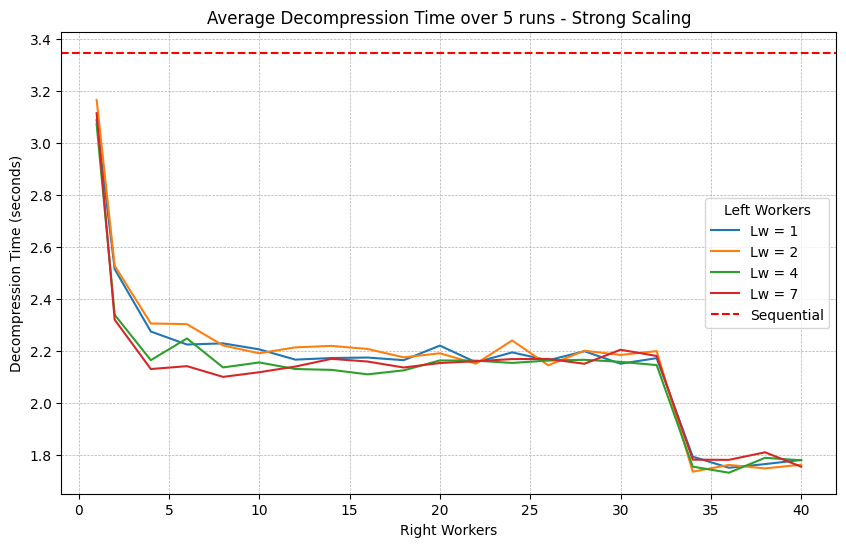

In [5]:
# Consider outputs/output_ff_49770.txt and outputs/output_ff_49794.txt (merge them)
file_content = []
file1 = open("outputs/output_ff_49770.txt", "r")
file2 = open("outputs/output_ff_49794.txt", "r")
file_content += file1.readlines()
file_content += file2.readlines()

# Parsing the data
data = parse_data(file_content)

# Averaging the data
avg_data = average_data(data)

# Plot the data
plot_compression_data(avg_data)

In [6]:
# Print the config for which the time is minimum
min_time = float('inf')
min_l = 0
min_r = 0
for l in avg_data:
    for r in avg_data[l]:
        if avg_data[l][r] < min_time:
            min_time = avg_data[l][r]
            min_l = l
            min_r = r
print(f"Minimum time: {min_time} for l={min_l}, r={min_r}")

Minimum time: 1.7303540000000002 for l=4, r=36


#### Speedup

In [7]:
# Plot the speedup for the case of l=2, varying r: sequential time / parallel time
speedup = [seq_avg / avg_data[2][r] for r in avg_data[2]]

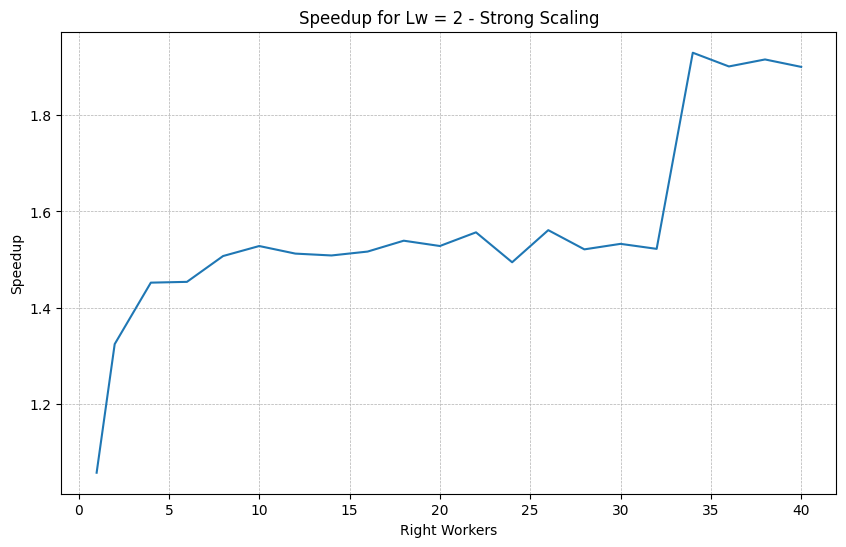

In [8]:
# Plot the speedup
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data[2].keys()), speedup, label="Speedup")
plt.xlabel("Right Workers")
plt.ylabel("Speedup")
plt.title("Speedup for Lw = 2 - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Scalability

In [9]:
# Plot the scalability for the case of l=2, varying r: time with l=r=1 / time with r workers and l=2
scalability = [avg_data[1][1] / avg_data[2][r] for r in avg_data[2]]

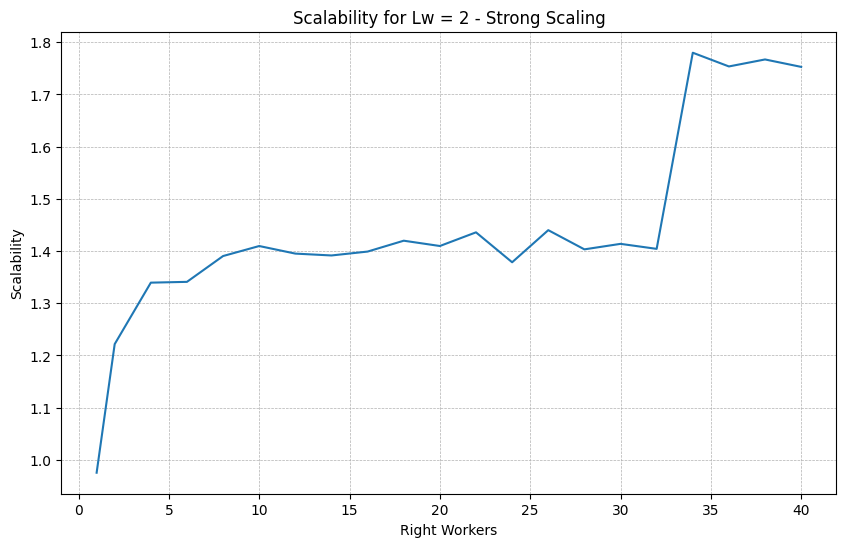

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data[2].keys()), scalability, label="Scalability")
plt.xlabel("Right Workers")
plt.ylabel("Scalability")
plt.title("Scalability for Lw = 2 - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Efficiency

In [11]:
# Plot the ecciiency for the case of l=2, varying r: speedup / r
efficiency = [speedup[i] / r for i, r in enumerate(sorted(avg_data[2].keys()))]

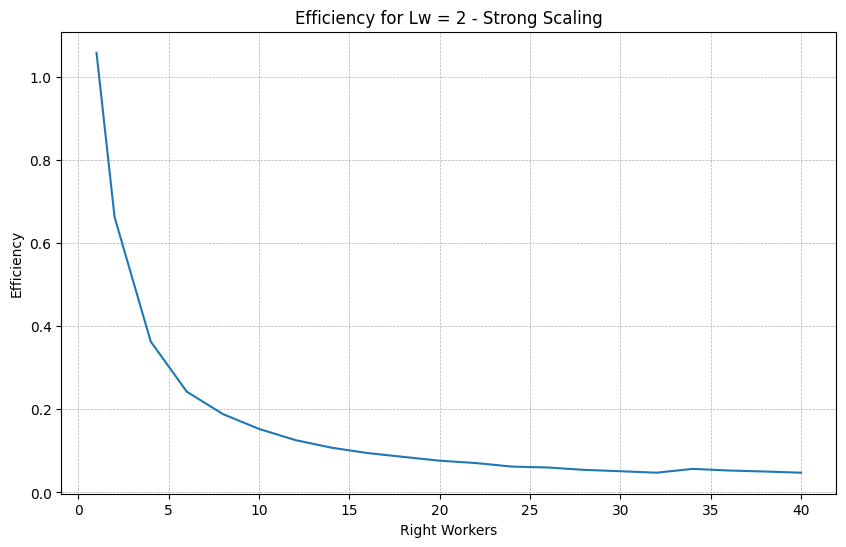

In [12]:
# Plot the efficiency
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data[2].keys()), efficiency, label="Efficiency")
plt.xlabel("Right Workers")
plt.ylabel("Efficiency")
plt.title("Efficiency for Lw = 2 - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

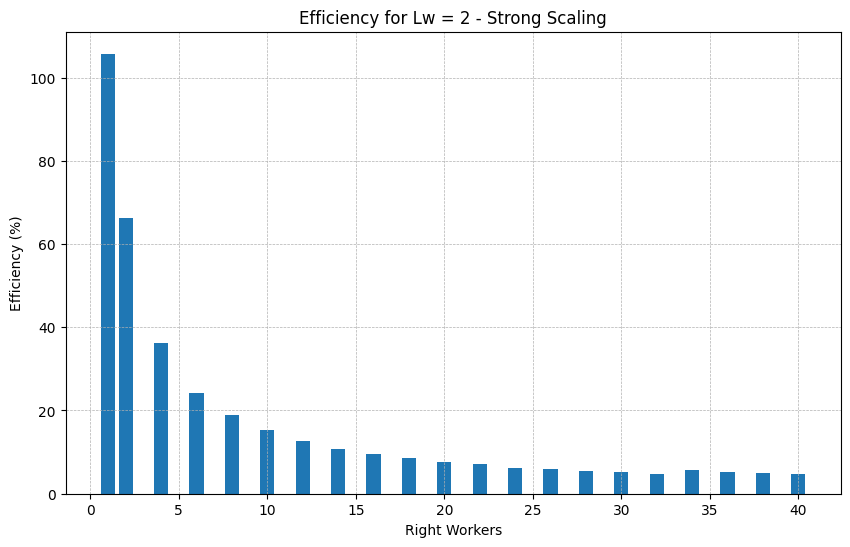

In [13]:
# Make an histogram of efficiency in percentage
efficiency_percentage = [e * 100 for e in efficiency]
plt.figure(figsize=(10, 6))
plt.bar(sorted(avg_data[2].keys()), efficiency_percentage)
plt.xlabel("Right Workers")
plt.ylabel("Efficiency (%)")
plt.title("Efficiency for Lw = 2 - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

---

### MPI

In [14]:
# COMPRESSION 

def parse_data_mpi(file_content):
    # Initialize an empty dictionary to store data for each combination of p
    data = {}

    # Process each line in the file
    for line in file_content:
        # Only care about 'Compression' lines
        if line.startswith("Decompression"):
            # Split the line into components
            parts = line.split(",")
            p = int(parts[1])
            time = float(parts[2])

            # Add data to the dictionary
            if p not in data:
                data[p] = []
            data[p].append(time)
    
    return data

# Function to calculate the average of each p
def average_data_mpi(data):
    avg_data = {}
    for p in data:
        avg_data[p] = np.mean(data[p])
    return avg_data

# Define the function to plot the data
def plot_compression_data_mpi(avg_data):
    plt.figure(figsize=(10, 6))

    # Plot the average compression time for each value of p
    p_values = sorted(avg_data.keys())  # Get sorted p values
    avg_times = [avg_data[p] for p in p_values]
    plt.plot(p_values, avg_times)

    # Add the sequential time to the plot
    plt.axhline(y=seq_avg, color='r', linestyle='--', label="Sequential")

    # Customize the plot
    plt.xlabel("Processes")
    plt.ylabel("Decompression Time (seconds)")
    plt.title("Average Decompression Time over 5 runs - Strong Scaling")
    # Light grid
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

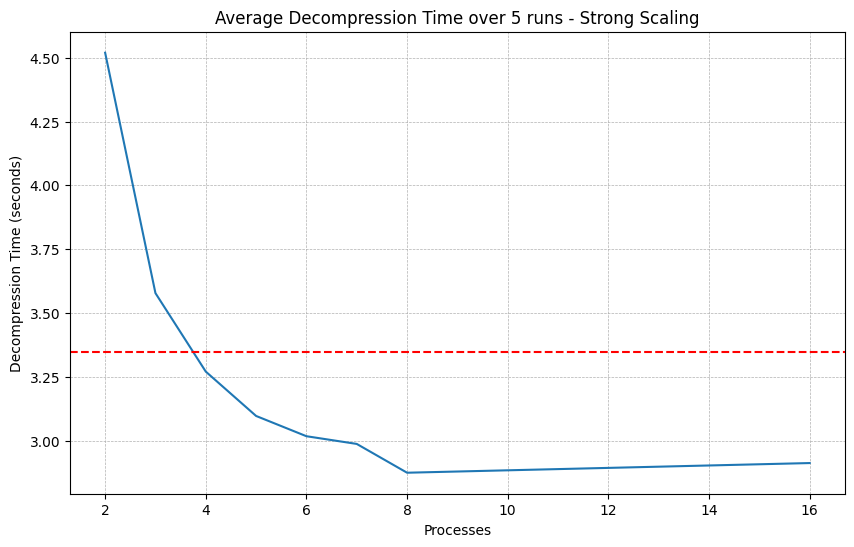

In [15]:
# Consider: outputs/output_mpi_49811.txt and outputs/output_mpi_16_49814.txt (merge them)
file_content = []
file1 = open("outputs/output_mpi_49811.txt", "r")
file2 = open("outputs/output_mpi_16_49814.txt", "r")
file_content += file1.readlines()
file_content += file2.readlines()

# Parsing the data
data = parse_data_mpi(file_content)

# Averaging the data
avg_data = average_data_mpi(data)

# Plot the data
plot_compression_data_mpi(avg_data)

In [16]:
# print the config for which the time is minimum
min_time = float('inf')
min_p = 0
for p in avg_data:
    if avg_data[p] < min_time:
        min_time = avg_data[p]
        min_p = p
print(f"Minimum time: {min_time} for p={min_p}")

Minimum time: 2.87389 for p=8


#### Speedup

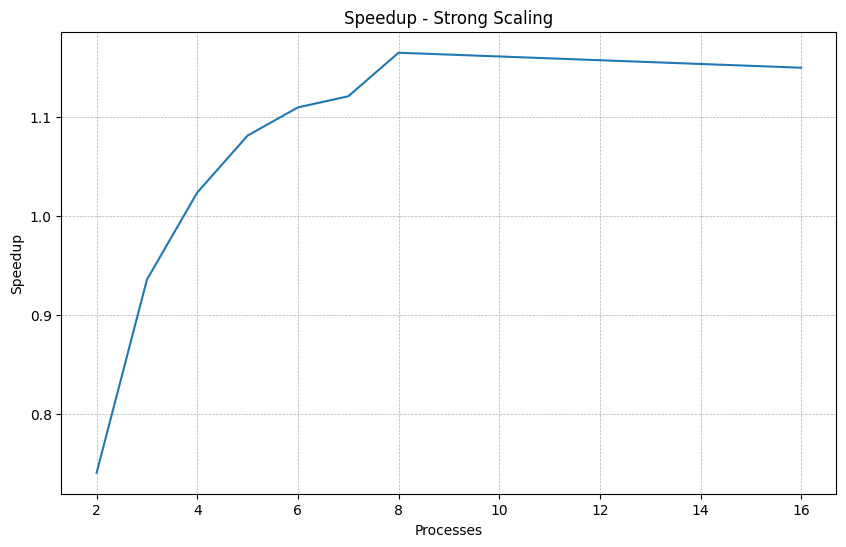

In [17]:
# plot the speedup: sequential time / parallel time
speedup = [seq_avg / avg_data[p] for p in avg_data]

# plot the speedup
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data.keys()), speedup, label="Speedup")
plt.xlabel("Processes")
plt.ylabel("Speedup")
plt.title("Speedup - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Scalability

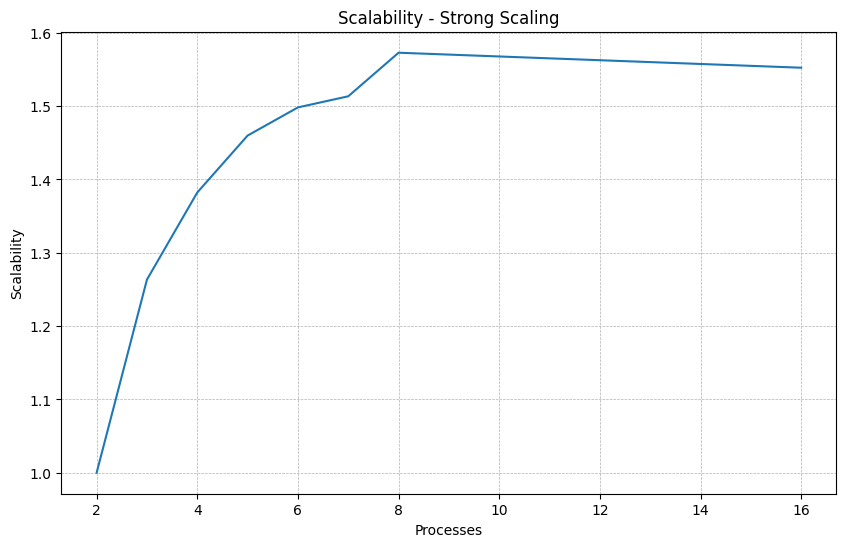

In [18]:
# plot the scalability: time with p=2 / time with p processes
scalability = [avg_data[2] / avg_data[p] for p in avg_data]

plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data.keys()), scalability, label="Scalability")
plt.xlabel("Processes")
plt.ylabel("Scalability")
plt.title("Scalability - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Efficiency

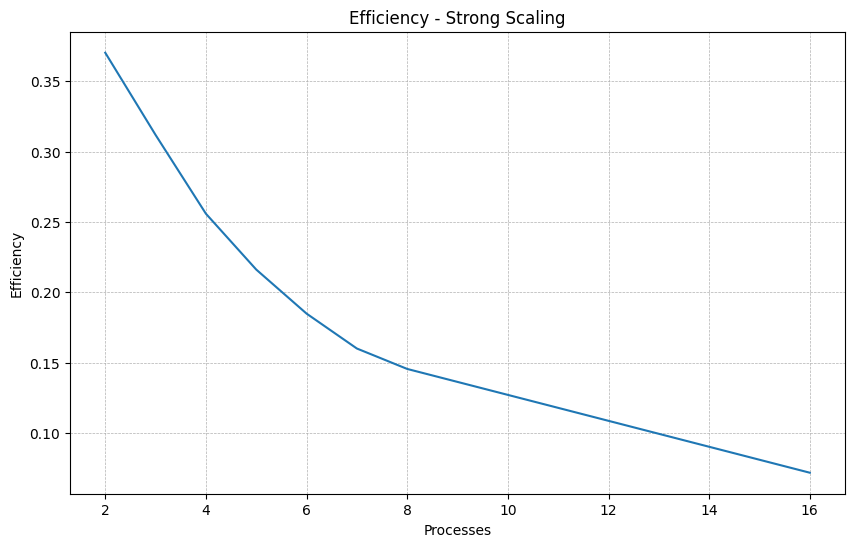

In [19]:
# plot the ecciiency: speedup / p
efficiency = [speedup[i] / p for i, p in enumerate(sorted(avg_data.keys()))]

# plot the efficiency
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data.keys()), efficiency, label="Efficiency")
plt.xlabel("Processes")
plt.ylabel("Efficiency")
plt.title("Efficiency - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

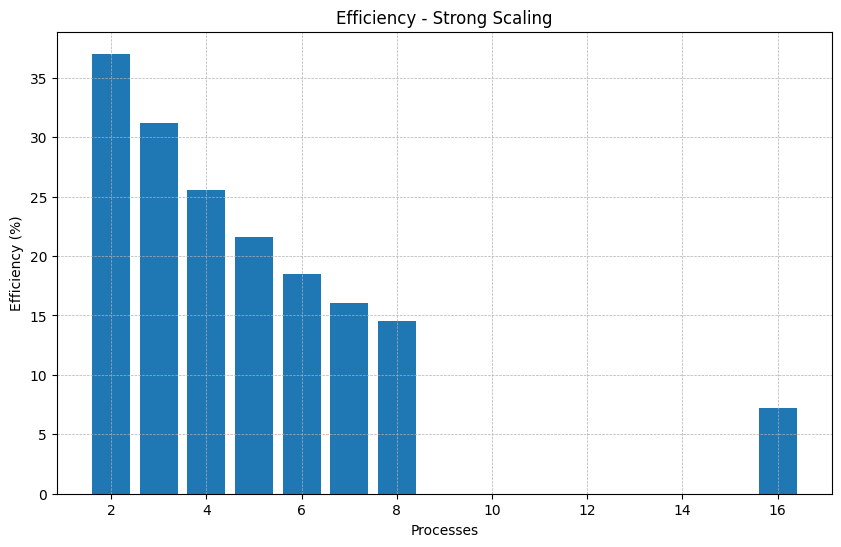

In [20]:
# make an histogram of efficiency in percentage
efficiency_percentage = [e * 100 for e in efficiency]
plt.figure(figsize=(10, 6))
plt.bar(sorted(avg_data.keys()), efficiency_percentage)
plt.xlabel("Processes")
plt.ylabel("Efficiency (%)")
plt.title("Efficiency - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

---

## Dataset 2
Dataset: 2 files of 128 MB each

### Sequential

In [21]:
# Extract Compression time for each run from file: outputs/output_seq_49830.txt
file_content = open("outputs/output_seq_49830.txt", "r").readlines()
file_content

['Run,0\n',
 'Compression,15.3308\n',
 'Decompression,3.4466\n',
 'Run,1\n',
 'Compression,15.2728\n',
 'Decompression,3.46184\n',
 'Run,2\n',
 'Compression,15.2649\n',
 'Decompression,3.48609\n',
 'Run,3\n',
 'Compression,15.3675\n',
 'Decompression,3.52283\n',
 'Run,4\n',
 'Compression,15.409\n',
 'Decompression,3.53927\n']

In [22]:
# Sequential times for 5 runs 
seq_times = [3.4466, 3.46184, 3.48609, 3.52283, 3.53927]
seq_avg = np.mean(seq_times)

print(seq_avg)

3.4913259999999995


### FastFlow

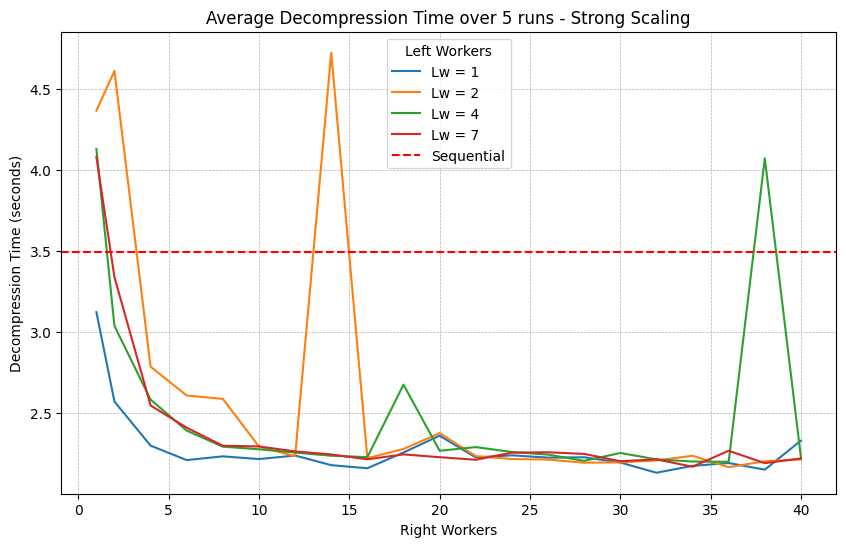

In [23]:
# Consider outputs/output_ff_49831.txt
file_content = open("outputs/output_ff_49831.txt", "r").readlines()

# Parsing the data
data = parse_data(file_content)

# Averaging the data
avg_data = average_data(data)

# Plot the data
plot_compression_data(avg_data)

In [24]:
# Print the config for which the time is minimum
min_time = float('inf')
min_l = 0
min_r = 0
for l in avg_data:
    for r in avg_data[l]:
        if avg_data[l][r] < min_time:
            min_time = avg_data[l][r]
            min_l = l
            min_r = r
print(f"Minimum time: {min_time} for l={min_l}, r={min_r}")

Minimum time: 2.131916 for l=1, r=32


We will consider Lw = 1 since it gave the minimum.

#### Speedup

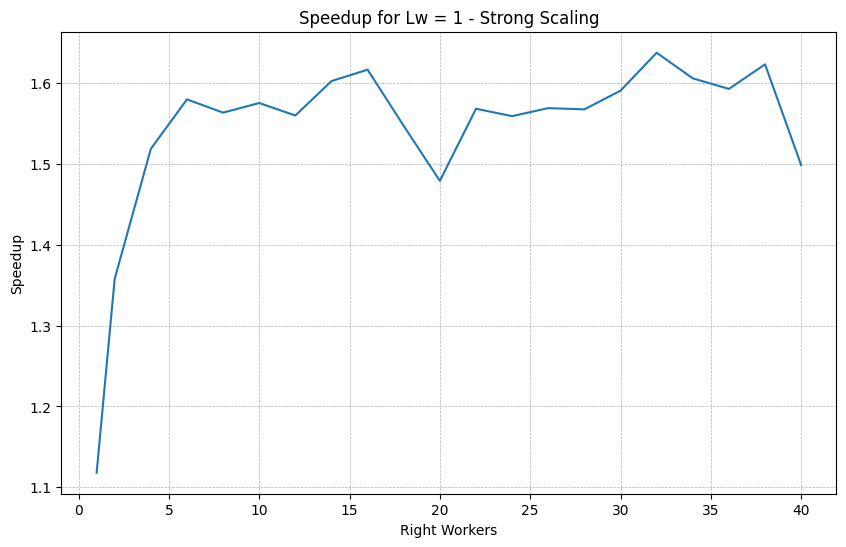

In [25]:
# Plot the speedup for the case of l=1, varying r: sequential time / parallel time
speedup = [seq_avg / avg_data[1][r] for r in avg_data[1]]

# Plot the speedup
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data[1].keys()), speedup, label="Speedup")
plt.xlabel("Right Workers")
plt.ylabel("Speedup")
plt.title("Speedup for Lw = 1 - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Scalability

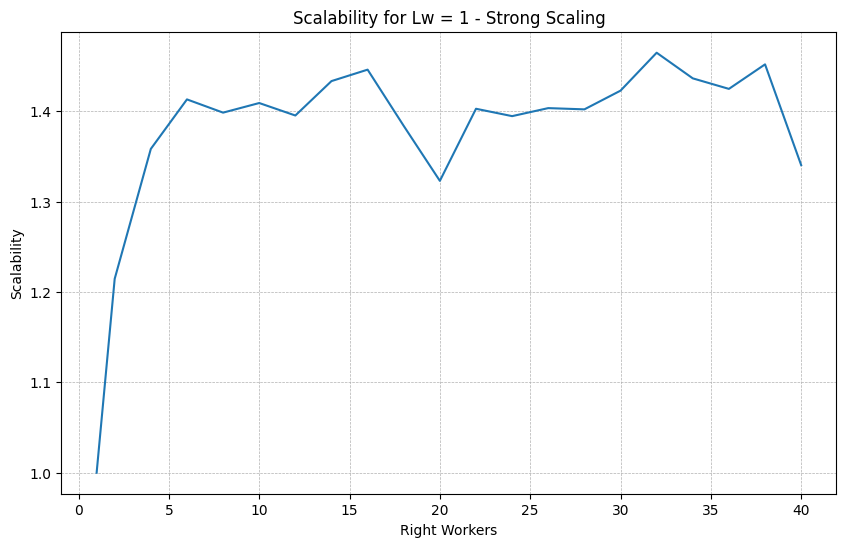

In [26]:
# Plot the scalability for the case of l=1, varying r: time with l=r=1 / time with r workers and l=1
scalability = [avg_data[1][1] / avg_data[1][r] for r in avg_data[1]]

plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data[1].keys()), scalability, label="Scalability")
plt.xlabel("Right Workers")
plt.ylabel("Scalability")
plt.title("Scalability for Lw = 1 - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Efficiency

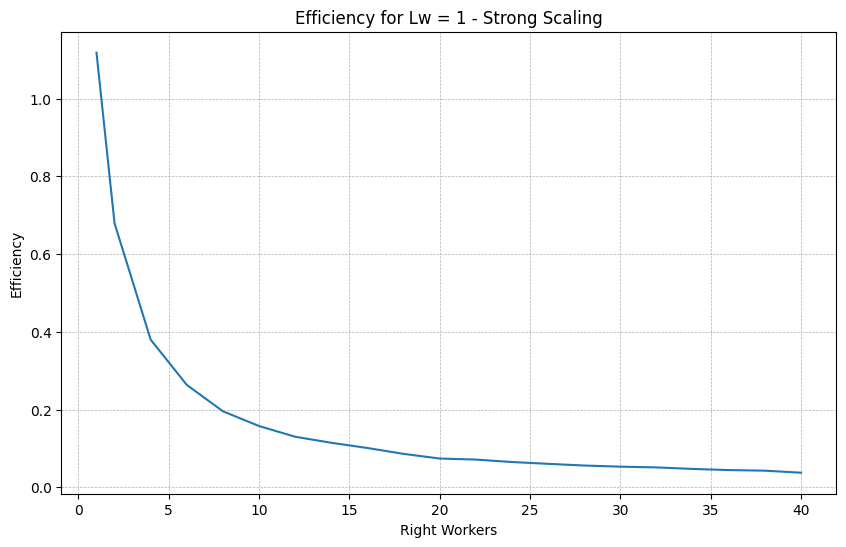

In [27]:
# Plot the ecciiency for the case of l=1, varying r: speedup / r
efficiency = [speedup[i] / r for i, r in enumerate(sorted(avg_data[1].keys()))]

# Plot the efficiency
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data[1].keys()), efficiency, label="Efficiency")
plt.xlabel("Right Workers")
plt.ylabel("Efficiency")
plt.title("Efficiency for Lw = 1 - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

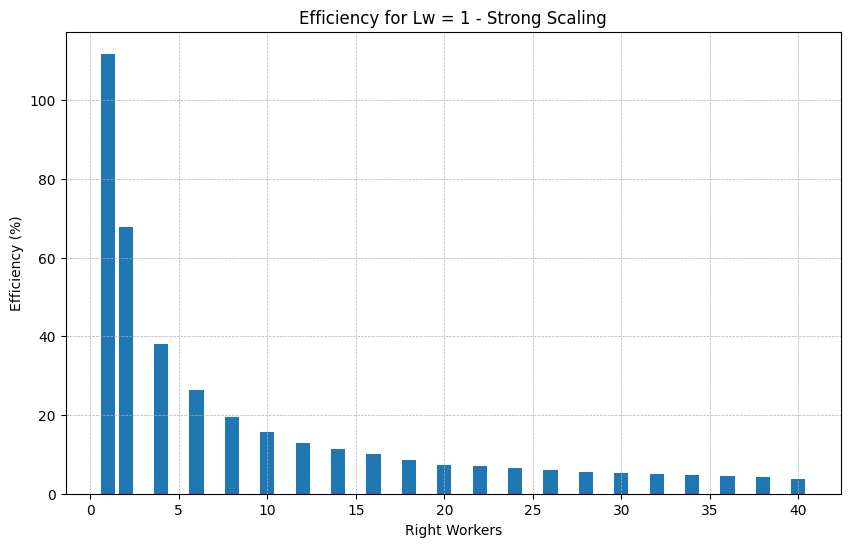

In [28]:
# Make an histogram of efficiency in percentage
efficiency_percentage = [e * 100 for e in efficiency]
plt.figure(figsize=(10, 6))
plt.bar(sorted(avg_data[1].keys()), efficiency_percentage)
plt.xlabel("Right Workers")
plt.ylabel("Efficiency (%)")
plt.title("Efficiency for Lw = 1 - Strong Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## Dataset 3

### Sequential

### FastFlow

### Speedup

### Scalability

### Efficiency

# Weak Scaling

## Dataset 
Dataset: 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200 MB

### Sequential

In [29]:
# COMPRESSION

def parse_data_seq(file_content):
    # Initialize an empty dictionary to store the data for each file
    data = {}

    # Process each line in the file
    for line in file_content:
        # Only care about 'Compression' lines
        if line.startswith("Decompression"):
            # Split the line into components
            parts = line.split(",")
            size = int(parts[1])
            time = float(parts[2])

            # Add data to the dictionary
            if size not in data:
                data[size] = []
            # add value time to the dictionary under the key size
            data[size].append(time)
    
    return data

# Function to calculate the average of each file
def average_data_seq(data):
    avg_data = {}
    for size in data:
        avg_data[size] = np.mean(data[size])
    return avg_data

In [30]:
file_content = open("outputs/output_seq_weak_49804.txt", "r").readlines()

data = parse_data_seq(file_content)

avg_data_seq = average_data_seq(data)

In [31]:
avg_data_seq

{5: np.float64(0.07867384),
 10: np.float64(0.1655828),
 20: np.float64(0.32911860000000004),
 30: np.float64(0.463688),
 40: np.float64(0.6185174),
 50: np.float64(0.7622639999999999),
 60: np.float64(0.9029219999999999),
 70: np.float64(1.034224),
 80: np.float64(1.1883659999999998),
 90: np.float64(1.308902),
 100: np.float64(1.4655680000000002),
 110: np.float64(1.585484),
 120: np.float64(1.761582),
 130: np.float64(1.90031),
 140: np.float64(2.079472),
 150: np.float64(2.1733919999999998),
 160: np.float64(2.3114339999999998),
 170: np.float64(2.467396),
 180: np.float64(2.6282900000000007),
 190: np.float64(2.7515039999999997),
 200: np.float64(2.876122)}

### FastFlow

In [32]:
# Define the function to plot the data
def plot_compression_data_weak(avg_data_seq, avg_data):
    plt.figure(figsize=(10, 6))

    # Map avg_data_seq keys to corresponding R-worker keys in avg_data[1]
    seq_keys = sorted(avg_data_seq.keys())
    r_worker_keys = sorted(avg_data[1].keys())  # Actual R-worker keys from avg_data[1]

    # Extract sequential values and map to R-worker
    seq_values = [avg_data_seq[k] for k in seq_keys]
    plt.plot(r_worker_keys, seq_values, label="Sequential", color="blue")

    # Plot avg_data for l=1
    r_values = sorted(avg_data[1].keys())
    avg_times = [avg_data[1][r] for r in r_values]
    plt.plot(r_values, avg_times, label="FastFlow (Lw = 1)", color="orange")

    # Customize the plot
    plt.xlabel("Right Workers")
    plt.ylabel("Decompression Time (seconds)")
    plt.title("Average Decompression Time over 5 runs - Weak Scaling")
    plt.legend()

    # Light grid
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

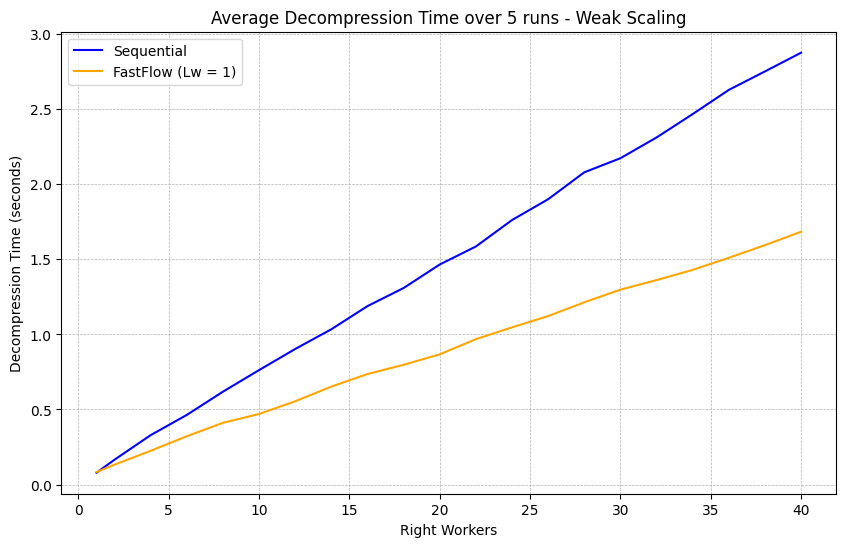

In [33]:
#file_content = open("outputs/output_ff_weak_49797.txt", "r").readlines() --> l=2
file_content = open("outputs/output_ff_weak_49808.txt", "r").readlines() #--> l=1

# Parsing the data
data = parse_data(file_content)

# Averaging the data
avg_data = average_data(data)

# Plot the data
plot_compression_data_weak(avg_data_seq, avg_data)

#### Speedup

In [34]:
# Get the speedup: sequential time / parallel time
speedup = [avg_data_seq[k] / avg_data[1][r] for k, r in zip(sorted(avg_data_seq.keys()), sorted(avg_data[1].keys()))]

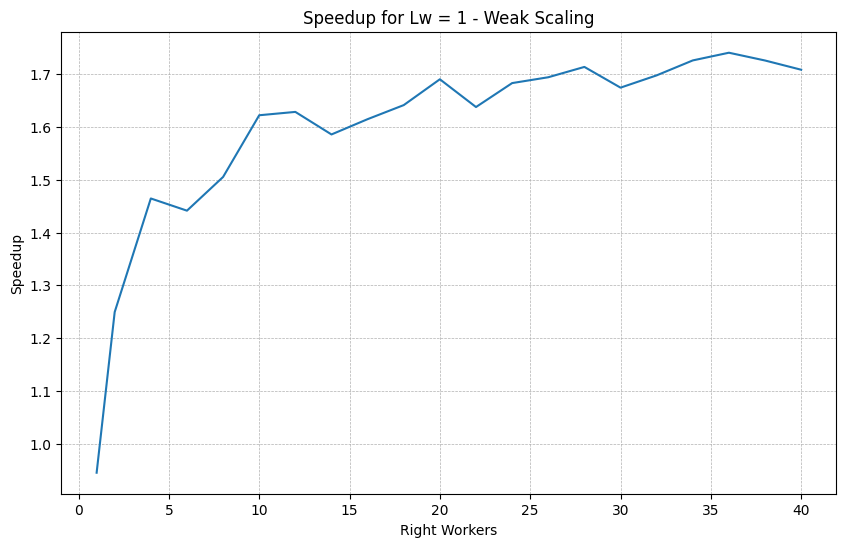

In [35]:
# Plot the speedup
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data[1].keys()), speedup, label="Speedup")
plt.xlabel("Right Workers")
plt.ylabel("Speedup")
plt.title("Speedup for Lw = 1 - Weak Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Efficiency

In [36]:
# Get the efficiency: speedup / r
efficiency = [s / r for s, r in zip(speedup, sorted(avg_data[1].keys()))]

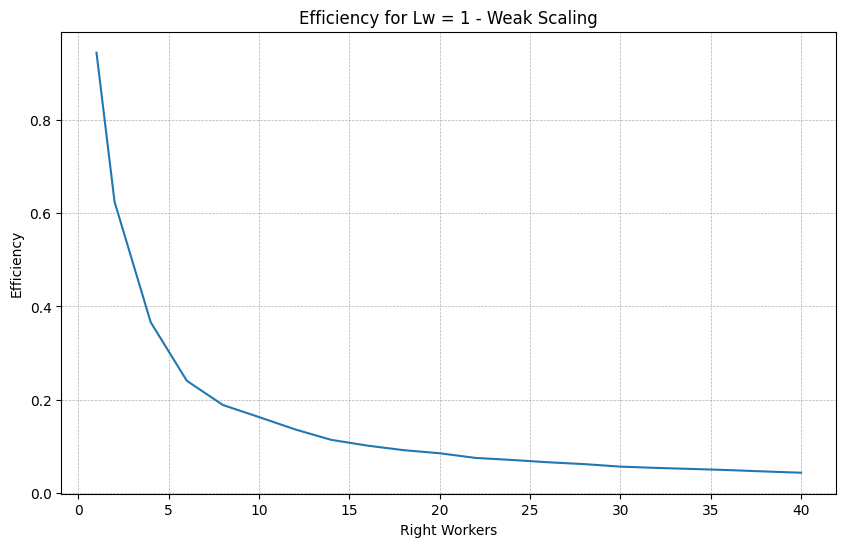

In [37]:
# Plot the efficiency
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data[1].keys()), efficiency, label="Efficiency")
plt.xlabel("Right Workers")
plt.ylabel("Efficiency")
plt.title("Efficiency for Lw = 1 - Weak Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

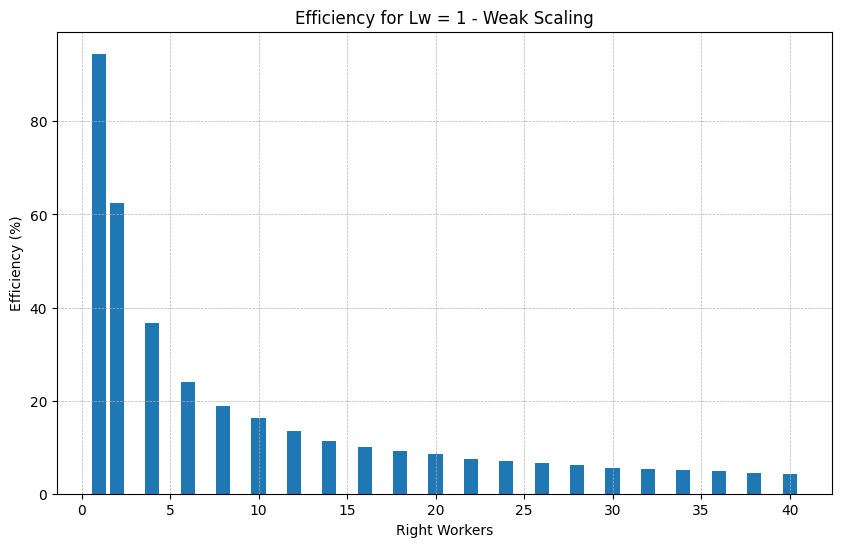

In [38]:
# Make an histogram of efficiency in percentage
efficiency_percentage = [e * 100 for e in efficiency]
plt.figure(figsize=(10, 6))
plt.bar(sorted(avg_data[1].keys()), efficiency_percentage)
plt.xlabel("Right Workers")
plt.ylabel("Efficiency (%)")
plt.title("Efficiency for Lw = 1 - Weak Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

---

### MPI

In [39]:
file_content = []
file1 = open("outputs/output_mpi_weak_49813.txt", "r")
file2 = open("outputs/output_mpi_weak_16_49815.txt", "r")
file_content += file1.readlines()
file_content += file2.readlines()

# Parsing the data
data = parse_data_mpi(file_content)

# Averaging the data
avg_data = average_data_mpi(data)

In [40]:
# consider only the keys: 20,30,40,50,60,70,80,160 in avg_data_seq
avg_data_seq = {k: avg_data_seq[k] for k in [20,30,40,50,60,70,80,160]}
avg_data_seq

{20: np.float64(0.32911860000000004),
 30: np.float64(0.463688),
 40: np.float64(0.6185174),
 50: np.float64(0.7622639999999999),
 60: np.float64(0.9029219999999999),
 70: np.float64(1.034224),
 80: np.float64(1.1883659999999998),
 160: np.float64(2.3114339999999998)}

In [41]:
def plot_compression_data_weak_mpi(avg_data_seq, avg_data):
    plt.figure(figsize=(10, 6))

    # Map avg_data_seq keys to corresponding P-worker keys in avg_data
    seq_keys = sorted(avg_data_seq.keys())
    p_worker_keys = sorted(avg_data.keys())  # Actual P-worker keys from avg_data

    # Extract sequential values and map to P-worker
    seq_values = [avg_data_seq[k] for k in seq_keys]
    plt.plot(p_worker_keys, seq_values, label="Sequential", color="blue")

    # Plot avg_data
    p_values = sorted(avg_data.keys())
    avg_times = [avg_data[p] for p in p_values]
    plt.plot(p_values, avg_times, label="MPI", color="orange")

    # Customize the plot
    plt.xlabel("Processes")
    plt.ylabel("Decompression Time (seconds)")
    plt.title("Average Decompression Time over 5 runs - Weak Scaling")
    plt.legend()

    # Light grid
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

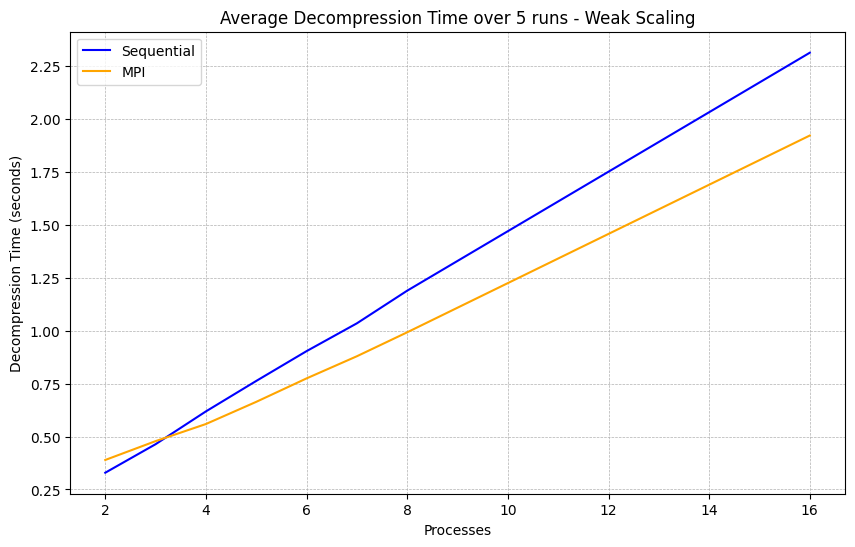

In [42]:
plot_compression_data_weak_mpi(avg_data_seq, avg_data)

#### Speedup

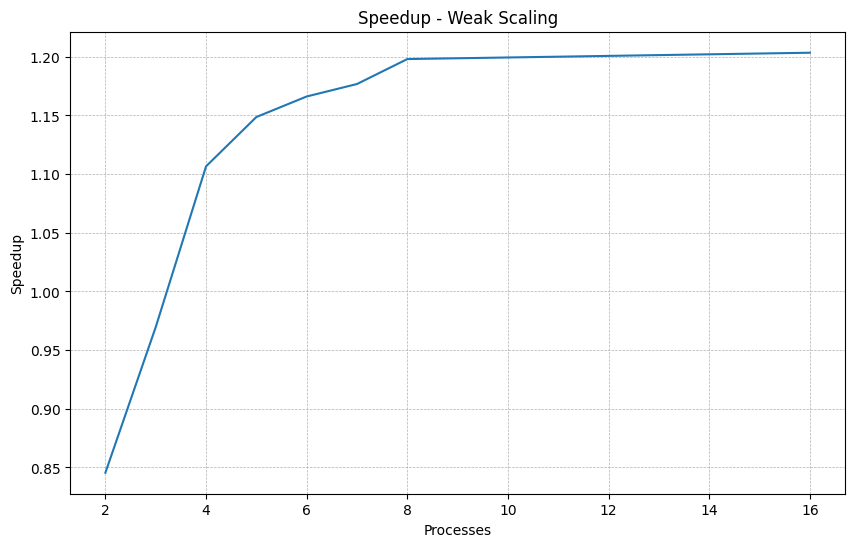

In [43]:
# Get the speedup: sequential time / parallel time
speedup = [avg_data_seq[k] / avg_data[p] for k, p in zip(sorted(avg_data_seq.keys()), sorted(avg_data.keys()))]

# Plot the speedup
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data.keys()), speedup, label="Speedup")
plt.xlabel("Processes")
plt.ylabel("Speedup")
plt.title("Speedup - Weak Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

#### Efficiency

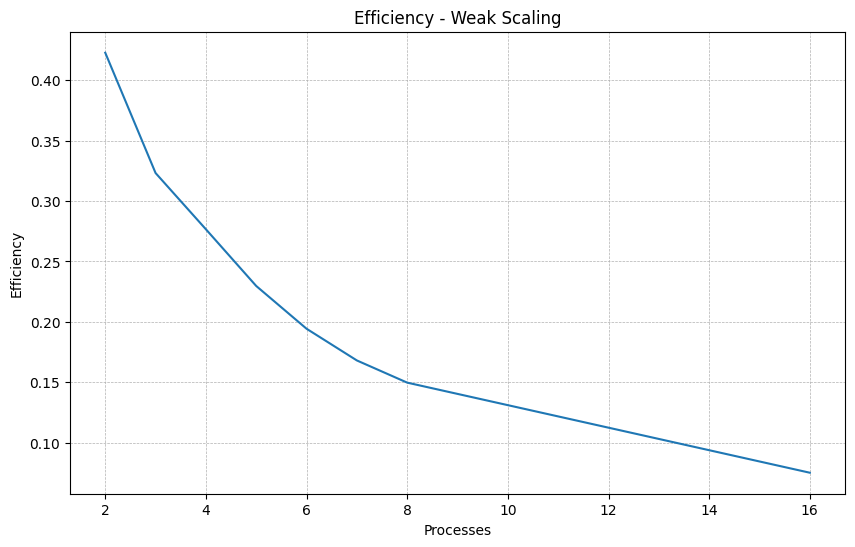

In [44]:
# Get the efficiency: speedup / p
efficiency = [s / p for s, p in zip(speedup, sorted(avg_data.keys()))]

# Plot the efficiency
plt.figure(figsize=(10, 6))
plt.plot(sorted(avg_data.keys()), efficiency, label="Efficiency")
plt.xlabel("Processes")
plt.ylabel("Efficiency")
plt.title("Efficiency - Weak Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

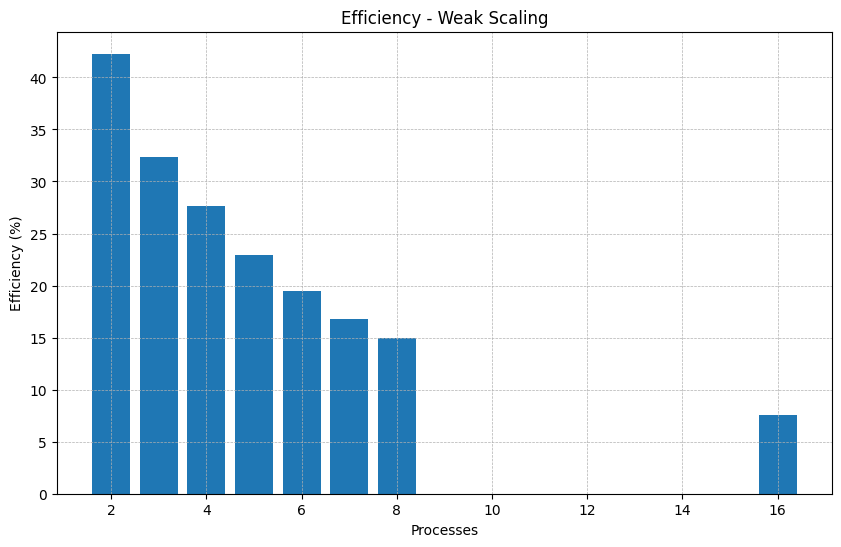

In [45]:
# Make an histogram of efficiency in percentage
efficiency_percentage = [e * 100 for e in efficiency]
plt.figure(figsize=(10, 6))
plt.bar(sorted(avg_data.keys()), efficiency_percentage)
plt.xlabel("Processes")
plt.ylabel("Efficiency (%)")
plt.title("Efficiency - Weak Scaling")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()